<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [5]:
# Imports

import pandas as pd
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [6]:
# Import Amazon Consumers Review csv

df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [7]:
# Check out the head of the Amazon Consumer Reviews dataframe

df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [8]:
# Set stopwords

STOPWORDS = set(STOPWORDS).union(set(['amazon', 'amazonbasics']))

# Define tokenizer function

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [9]:
# Tokenize reviews.text column 

df['tokens'] = df['reviews.text'].apply(lambda x: tokenize(x))

In [10]:
# A Dictionary Representation of all the words in our corpus

id2word = corpora.Dictionary(df['tokens'])

In [11]:
# Check out list of 20 id2word items

list(id2word.items())[:20]

[(0, 'aluminum'),
 (1, 'backup'),
 (2, 'bad'),
 (3, 'battery'),
 (4, 'item'),
 (5, 'missing'),
 (6, 'order'),
 (7, 'pcs'),
 (8, 'quality'),
 (9, 'spring'),
 (10, 'work'),
 (11, 'bulk'),
 (12, 'expensive'),
 (13, 'like'),
 (14, 'products'),
 (15, 'way'),
 (16, 'duracell'),
 (17, 'happy'),
 (18, 'price'),
 (19, 'batteries')]

In [12]:
# Make a corpus with bag of words

# A bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
# Although abstracted away - tokenization IS happening in the tokenize f(x)

corpus = [id2word.doc2bow(text) for text in df['tokens']]

In [13]:
# Make a LDA Topic Model

lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15, # depends on the corpus
                   passes=10,
                   workers=12
                  )

# sklearn does all the computations right away, but gensim does not do this, it uses the print_topics() method

In [14]:
# Print LDA topics

lda.print_topics()

[(0,
  '0.033*"daughter" + 0.021*"great" + 0.020*"kids" + 0.018*"loves" + 0.018*"easy" + 0.014*"gift" + 0.014*"purchased" + 0.014*"love" + 0.011*"children" + 0.011*"tablet"'),
 (1,
  '0.044*"tablet" + 0.034*"games" + 0.026*"loves" + 0.024*"apps" + 0.021*"kids" + 0.019*"old" + 0.017*"great" + 0.017*"year" + 0.015*"love" + 0.015*"daughter"'),
 (2,
  '0.036*"love" + 0.024*"tablet" + 0.020*"bought" + 0.019*"kindle" + 0.015*"screen" + 0.012*"great" + 0.010*"better" + 0.009*"hd" + 0.009*"card" + 0.008*"gb"'),
 (3,
  '0.068*"great" + 0.043*"bought" + 0.040*"loves" + 0.040*"use" + 0.034*"easy" + 0.029*"old" + 0.028*"gift" + 0.025*"tablet" + 0.023*"year" + 0.021*"christmas"'),
 (4,
  '0.032*"old" + 0.024*"tablet" + 0.021*"battery" + 0.018*"use" + 0.015*"great" + 0.015*"year" + 0.015*"kindle" + 0.015*"like" + 0.012*"purchased" + 0.012*"life"'),
 (5,
  '0.037*"great" + 0.031*"tablet" + 0.030*"works" + 0.020*"price" + 0.019*"apps" + 0.017*"google" + 0.013*"buy" + 0.012*"good" + 0.012*"play" + 0.01

In [15]:
# Get words from lda.print_topics, whicle cleaning them when regex

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [16]:
# Join words to form topics

topics = [' '.join(t[0:5]) for t in words]

In [17]:
# Print Topics

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")
    
# difficult with similar topics, yet these seem good for gift shopping and marketing

------ Topic 0 ------
daughter great kids loves easy

------ Topic 1 ------
tablet games loves apps kids

------ Topic 2 ------
love tablet bought kindle screen

------ Topic 3 ------
great bought loves use easy

------ Topic 4 ------
old tablet battery use great

------ Topic 5 ------
great tablet works price apps

------ Topic 6 ------
tablet movies great watch use

------ Topic 7 ------
tablet great price good value

------ Topic 8 ------
batteries brand work like buy

------ Topic 9 ------
kids tablet great love time

------ Topic 10 ------
tablet work good bought buy

------ Topic 11 ------
screen kindle great little model

------ Topic 12 ------
kindle books read easy use

------ Topic 13 ------
tablet good bought best buy

------ Topic 14 ------
good great price batteries long



In [18]:
# Import pyLDAvis for awesome visualtions

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [19]:
# pyLDAvis Gensim visualization of LSA, Corpus, and id2word

# pyLDAvis.gensim.prepare(lda, corpus, id2word) # This will break Jupyer Lab buttons

vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)

pyLDAvis.save_html(vis, "../module4-topic-modeling/pyLDAvisAssignment.html")

# Put slider close to 0, hover over a topic, and it will show terms that are more unique to that topic

In [20]:
# LDA corpus at first position, to begin scoring topic distribution

lda[corpus[0]]

[(5, 0.114722826), (6, 0.5535216), (13, 0.26493964)]

In [21]:
# Make topic distribution

distro = [lda[d] for d in corpus]

In [22]:
# Verify distribution is in order

distro[0]

[(5, 0.11472228), (6, 0.5535268), (13, 0.2649349)]

In [23]:
# Update the distribution to a complete distribution

distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [24]:
# Check length of new distribution

len(new_distro)

28332

In [25]:
# Check df head

df.head()

# tokens are at the end, consider making a smaller df with less columns

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, item, bad, quality, missing, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, batteries, better, price]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[batteries, long, lasting, price, great]"


In [26]:
# Make a new dataframe called tf for topicframe, for the distribution

tf = pd.DataFrame.from_records(new_distro, index=df.primaryCategories)
tf.columns = topics

In [27]:
# Check out the head of the tf

tf.head()

,daughter great kids loves easy,tablet games loves apps kids,love tablet bought kindle screen,great bought loves use easy,old tablet battery use great,great tablet works price apps,tablet movies great watch use,tablet great price good value,batteries brand work like buy,kids tablet great love time,tablet work good bought buy,screen kindle great little model,kindle books read easy use,tablet good bought best buy,good great price batteries long
primaryCategories,,,,,,,,,,,,,,,
Health & Beauty,0.000000,0.000000,0.000000,0.000000,0.000000,0.114752,0.553613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264819,0.000000
Health & Beauty,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112,0.844438,0.011112,0.011112,0.011112,0.011112,0.011112,0.011112
Health & Beauty,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766661
Health & Beauty,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844443,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
Health & Beauty,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844444


In [28]:
# Make a Coherence Model

from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

# higher coherence means when the topics were taken, words samlpled according to proportions, would recreate the document really well
# complex, but good to have intuition, and study more

In [35]:
# Declare coherence values

# Can take a long time to run.

coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1) # don't want this number to be low, because then the model won't learn, too high and wastes computatinal resources

In [36]:
# Make topic coherence dataframe

topic_coherence = pd.DataFrame.from_records(coherence_values)

In [37]:
# Check out head of topic coherence dataframe

topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-2.589974
1,0,4,-2.770889
2,0,6,-2.830692
3,0,8,-2.692227
4,0,10,-2.905644


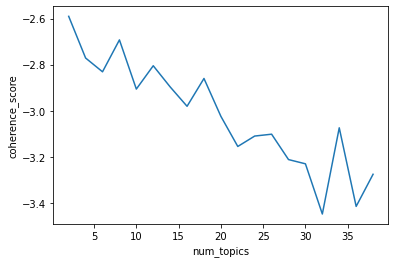

In [38]:
# Plot topic coherence

import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

# Don't want topics too low, or too high, maybe around 9 in lecture example, then go back and retrain LDA model on this number
# Go back and rename topics with human intuition, not easy to do, but useful
# What are topics useful for? ie: use topics for recommendations

In [39]:
# Enter a sample document to score with a topic distribution

lda[id2word.doc2bow(tokenize("Oh my wow! This is best product I have ever bought!."))]

[(0, 0.0111138495),
 (1, 0.011113852),
 (2, 0.39600945),
 (3, 0.011113897),
 (4, 0.01111386),
 (5, 0.011113868),
 (6, 0.011113855),
 (7, 0.011113874),
 (8, 0.011113881),
 (9, 0.011113867),
 (10, 0.011113874),
 (11, 0.011113864),
 (12, 0.011113851),
 (13, 0.45951027),
 (14, 0.011113887)]

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling